In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

%config InlineBackend.figure_format = 'retina'

In [3]:
# Accessing all data files for QKD

# Establishing the path for each file
folder = '../../qkd/'
path_qkd_noise = folder + 'qkd_results_noise.txt'
path_qkd_sim = folder + 'qkd_results_simulator.txt'

# Storing all data as local variables
noise = pd.read_csv(path_qkd_noise, sep=',', dtype=str)
simulator = pd.read_csv(path_qkd_sim, sep=',', dtype=str)

In [4]:
# data_simulator = simulator
data_noise = noise
data_sim = simulator

In [5]:
qubits = data_noise['Qubits'].tolist()
key_length = data_noise['Average Key Length'].astype(float).tolist()
success_rate = data_noise['Success Rate'].astype(float).tolist()

qubits_sim = data_sim['Qubits'].tolist()
key_length_sim = data_sim['Average Key Length'].astype(float).tolist()
success_rate_sim = data_sim['Success Rate'].astype(float).tolist()

In [7]:
def plot_fig(x, y, title, xlabel, ylabel, save_fig=False, figname=None):
    dpi = 400
    fig,ax = plt.subplots(figsize=(10,6), dpi=dpi)

    ax.plot(x, y, color='tomato')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # ax.grid(True)

    if save_fig and figname:
        fig.savefig(figname, dpi=dpi, format='png')
        print(f"Wrote figure to {figname}")

    if not save_fig or (save_fig and figname is None):
        plt.show()

    return fig

In [12]:
%%capture

Fig = plot_fig(qubits_sim, key_length_sim,
                "Resulting Key Length in QKD Protocol Varying Number of Qubits Used - Ideal Simulator",
                "Number of Qubits in Protocol",
                "Average Key Length",
                save_fig=True,
                figname='qkd-key-length-simulator.png'
                )

In [15]:
%%capture

Fig = plot_fig(qubits, success_rate,
                "QKD Protocol Success Rate Varying Number of Qubits Used - Noisy Simulator",
                "Number of Qubits in Protocol",
                "Success Rate",
                save_fig=True,
                figname='qkd-success-rate-noise.png'
                )

In [18]:
def plot_dual_fig(x, y1, y2, title, ylabel, label1, label2, xlabel="Number of Qubits in Protocol", save_fig=False, figname=None):
    dpi = 400
    fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)

    # Plot the first dataset
    ax.plot(x, y1, label=label1, color='tomato')
    # Plot the second dataset
    ax.plot(x, y2, label=label2, color='dodgerblue')

    # Adding title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Adding legend to distinguish the two datasets
    ax.legend()

    # Handling the saving of the figure
    if save_fig and figname:
        fig.savefig(figname, dpi=dpi, format='png')
        print(f"Wrote figure to {figname}")

    # Show plot if not saving or if saving without a specified filename
    if not save_fig or (save_fig and figname is None):
        plt.show()

    return fig

Wrote figure to qkd-success-rate-comparison.png


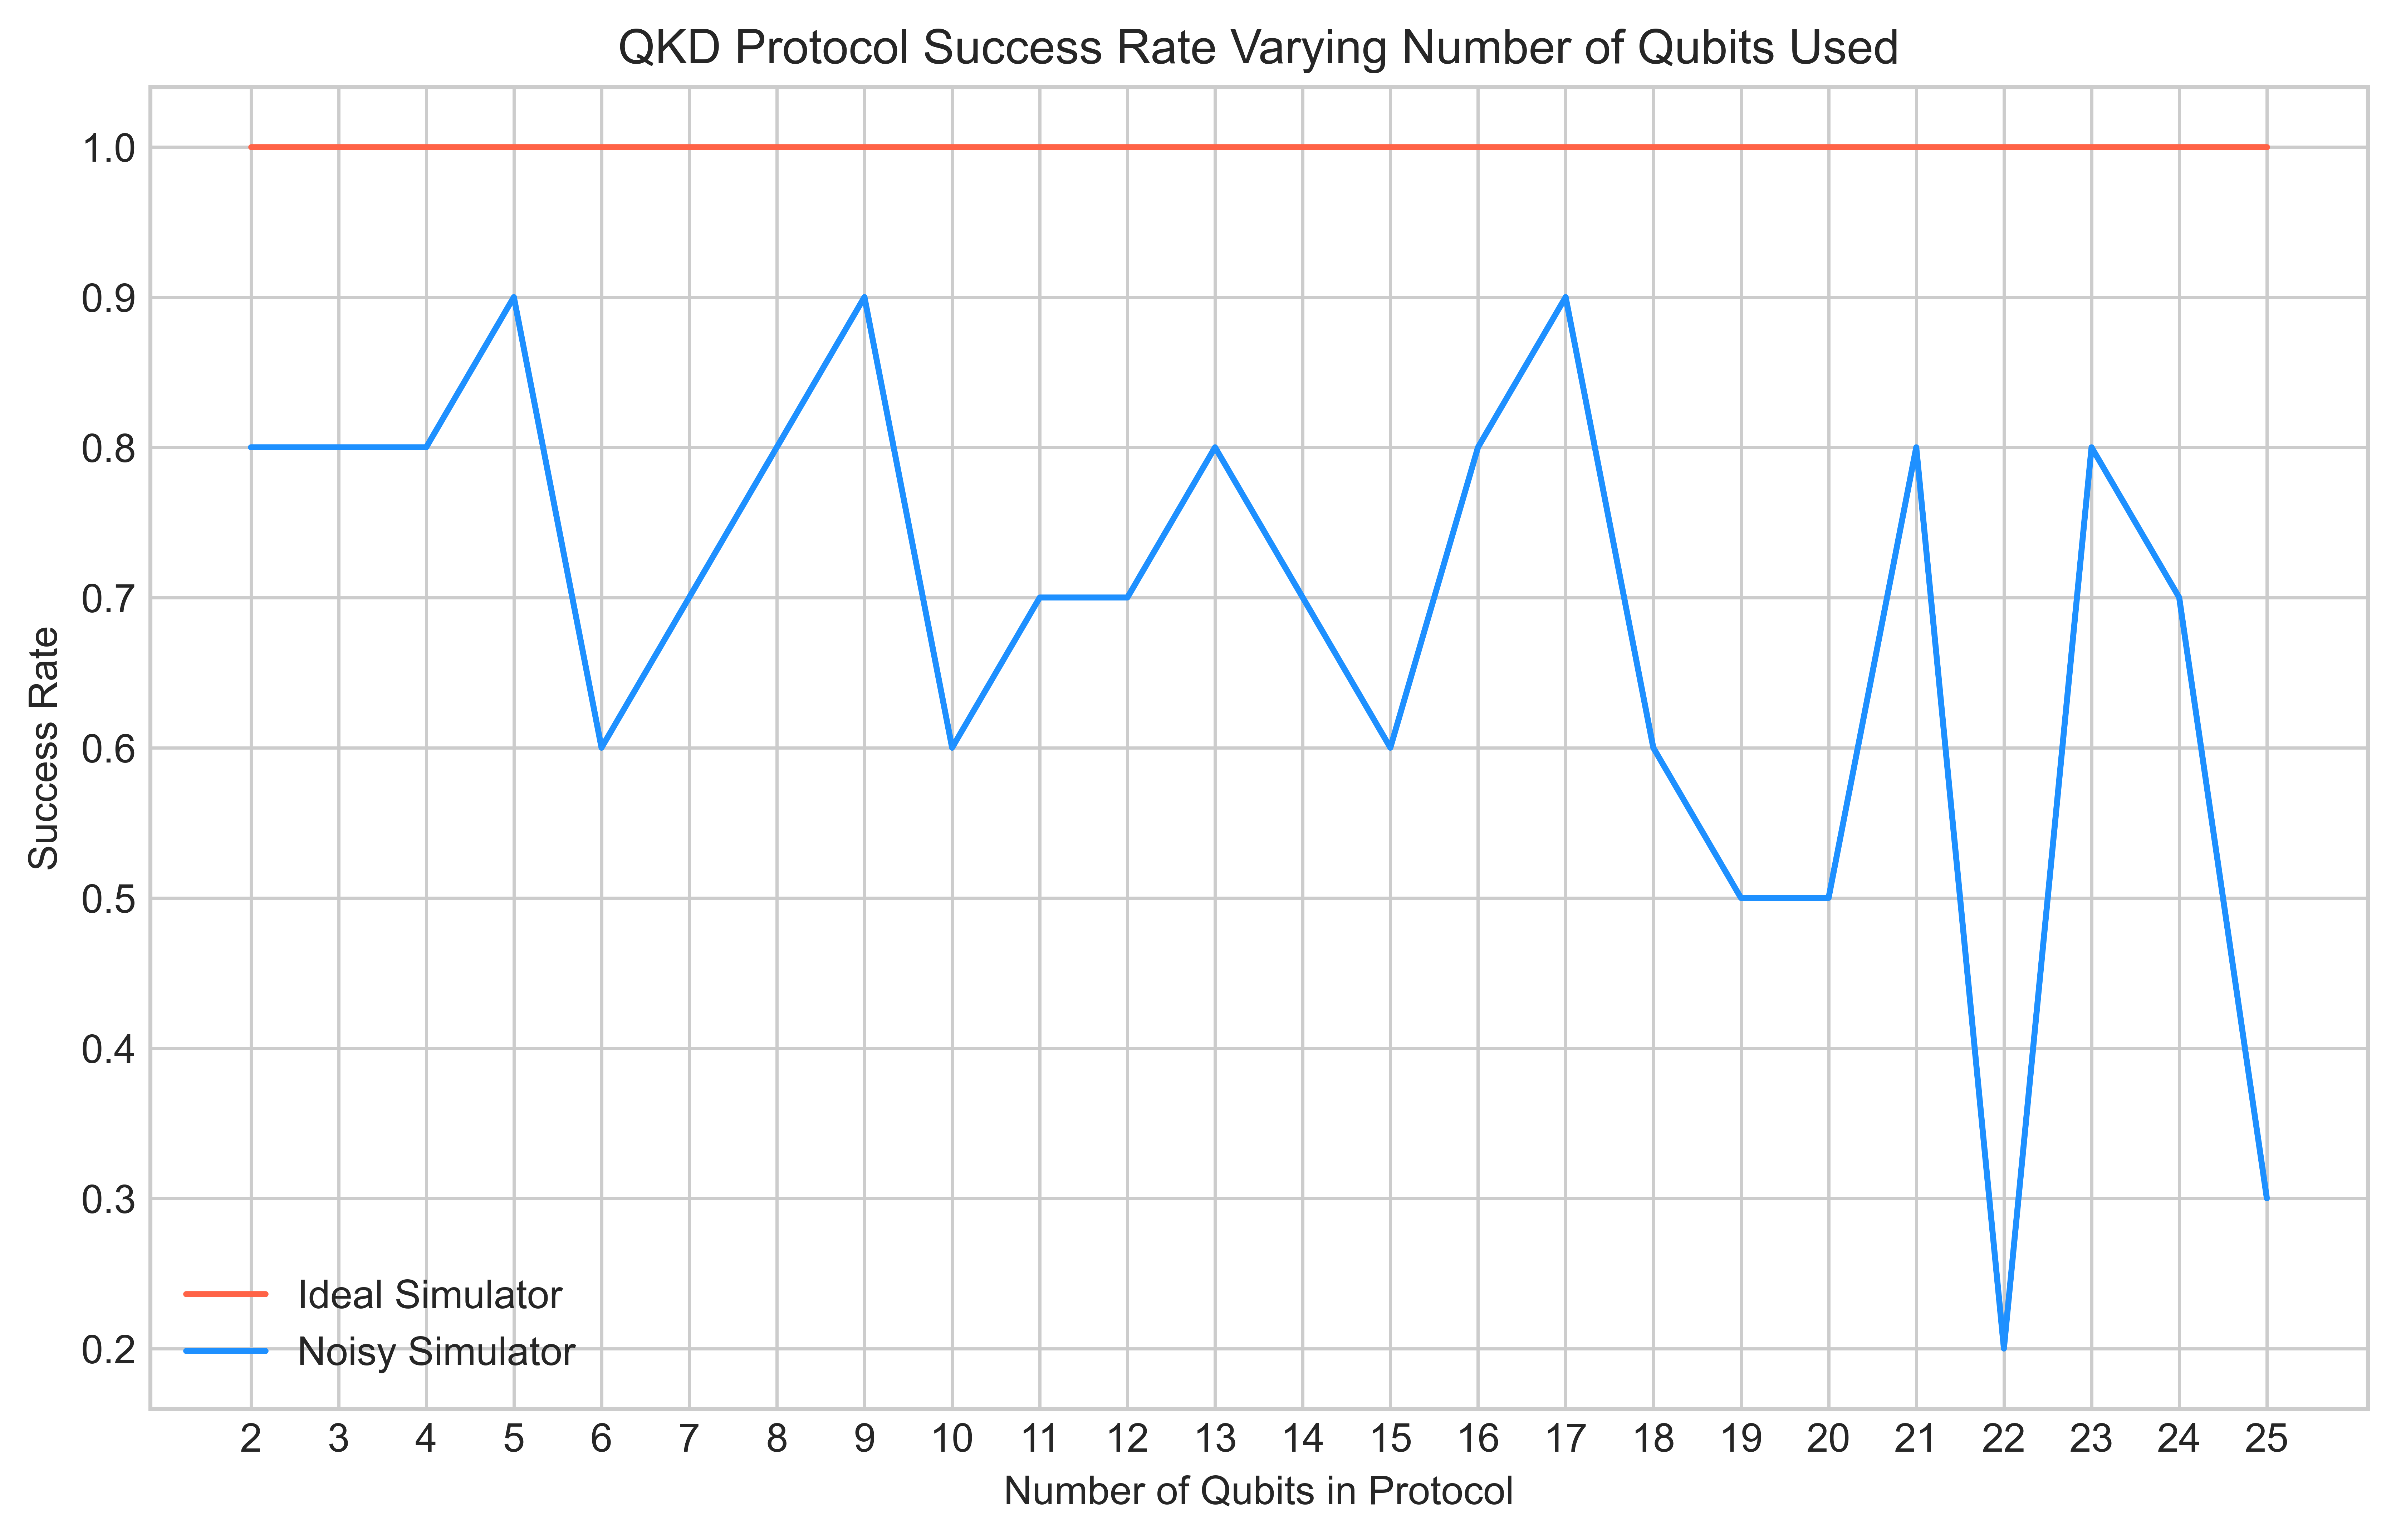

In [22]:
Fig = plot_dual_fig(
    qubits,
    success_rate_sim,
    success_rate,
    "QKD Protocol Success Rate Varying Number of Qubits Used",
    "Success Rate",
    "Ideal Simulator",
    "Noisy Simulator",
    save_fig=True,
    figname='qkd-success-rate-comparison.png'
)